# Fashion selling data

**The problem**

Company A sells fashion. They have stores in each country’s capital: UK (London); FR (Paris); IT (Milan); GER (Berlin). Their customers either buy online or in the store itself.
At the same time, it maintains a website of individual product pages with writeups and images about the page. In some cases, the page might have gone up after the product was put up for sale.


**Target**

1.	What is the impact of our website traffic on revenue?     

2.	Which products get us pageviews and revenue?

3.	What customer segments are there?    




# Import Libraries

In [140]:
!pip install kneed

In [141]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime as dt
import scipy.stats as stats

from datetime import date
from termcolor import colored


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

from kneed import KneeLocator

print('OK')

OK


 # Loading Data

## Customers

### Customer info

In [142]:
#Read dataset
customer_info = pd.read_excel(r'customers.xlsx')
customer_info.head(10)

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N
5,5,Celin0.498684223052738,Tio0.597043135639238,GER - Germany,2015-12-23,F,1979-03-27,Y
6,6,Ad0.410135716954602,Tan0.662463855720801,GER - Germany,2015-12-23,M,1984-06-01,N
7,7,Ev0.291189764697797,Kh0.766529502176661,GER - Germany,2015-12-24,F,1970-11-12,Y
8,8,S0.892783416837388,WEN0.271074390106408,FR - France,2015-12-28,M,1991-02-28,Y
9,9,Chok0.637930969851357,SW0.984189910495377,FR - France,2015-04-01,NaN,1984-02-14,Y


### Items

In [143]:
items = pd.read_excel(r'customers.xlsx',sheet_name=1)
items.head()

,ItemID,Product,Brand,SellPrice,CostPrice
0,1,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943,359
1,2,070ttream0.518887735674677,GO4582ey<S!+k1VE,717,207
2,3,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739,199
3,4,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532,262
4,5,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593,392


### Customer transactions

In [144]:
customer_transactions = pd.read_excel('customers.xlsx',sheet_name=2)
customer_transactions.head()

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0,0,352,2020-03-21,In Store
1,0,0,3433,2020-07-14,In Store
2,0,0,11162,2020-08-09,In Store
3,0,0,13011,2020-12-07,In Store
4,0,0,13885,2020-11-08,In Store


## Traffics

In [145]:
traffic_01 = pd.read_excel(r'2020_01.xlsx',sheet_name=0)
traffic_02 = pd.read_excel(r'2020_02.xlsx',sheet_name=0)
traffic_03 = pd.read_excel(r'2020_03.xlsx',sheet_name=0)
traffic_04 = pd.read_excel(r'2020_04.xlsx',sheet_name=0)
traffic_05 = pd.read_excel(r'2020_05.xlsx',sheet_name=0)
traffic_06 = pd.read_excel(r'2020_06.xlsx',sheet_name=0)
traffic_07 = pd.read_excel(r'2020_07.xlsx',sheet_name=0)
traffic_08 = pd.read_excel(r'2020_08.xlsx',sheet_name=0)
traffic_09 = pd.read_excel(r'2020_09.xlsx',sheet_name=0)
traffic_10 = pd.read_excel(r'2020_10.xlsx',sheet_name=0)
traffic_11 = pd.read_excel(r'2020_11.xlsx',sheet_name=0)
traffic_12 = pd.read_excel(r'2020_12.xlsx',sheet_name=0)

In [146]:
traffics = pd.concat([traffic_01, traffic_02,traffic_03,traffic_04,traffic_05,\
                     traffic_06,traffic_07,traffic_08,traffic_09,traffic_10,traffic_11,traffic_12],\
                    ignore_index=True)

In [147]:
traffics

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669.2,5777.8,6286.4,"Ki)D3jDmA,RIP68X",2020-01-10 16:56:13
1,/2020/1/070ttream0.518887735674677,359.8,370.4,403.4,GO4582ey<S!+k1VE,2020-01-10 05:04:35
2,/2020/1/070htream0.333307794468401,587.6,614.2,657.6,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08
3,/2020/1/100Grseys0.271522111052549,1284.0,1308.6,1385.4,Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24
4,/2020/1/100[nside0.645837365801341,1846.0,1880.8,2025.0,Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08
...,...,...,...,...,...,...
17884,/2020/12/yinfbowls0.6558670149224,130.0,133.2,142.2,HoXbja)_x007f_qT:ESE8#,2020-12-01 04:55:35
17885,/2020/12/yosolease0.0455049365834417,314.6,325.6,365.2,"YoRQW7@*&5W+~4Y""",2020-12-03 15:25:00
17886,/2020/12/you^-info0.127669879156147,1419.6,1448.4,1615.8,"MouDd/fn,XEARhBp",2020-12-06 23:57:54
17887,/2020/12/youe-info0.729842478879044,483.8,487.6,509.6,"yo4}AUKGso=,?!DX",2020-12-04 05:59:22


In [148]:
# Slice Products in Page URL
traffics['Product'] = range(len(traffics['Page URL']))
for i in range(len(traffics['Page URL'])):
    traffics['Product'][i] = traffics['Page URL'].iloc[i].split('/')[-1] # Extract the product information

<ipython-input-148-a5a02f2e064d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffics['Product'][i] = traffics['Page URL'].iloc[i].split('/')[-1] # Extract the product information


In [149]:
traffics.sort_values('Posted On (DD/MM/YYYY)', ascending=True, inplace=True, ignore_index=True)


In [150]:
traffics.head()

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Product
0,/2020/1/vanBip-on0.100834672919284,1034.8,1048.4,1134.4,"Vag9""-Z=gN30ND@[",2020-01-01 01:03:02,vanBip-on0.100834672919284
1,/2020/1/fujBdence0.385183712192661,4097.8,4142.6,4457.2,ToOYo&o|?(;MH>V:,2020-01-01 01:46:40,fujBdence0.385183712192661
2,/2020/1/baiXpsule0.236876019278184,642.6,653.8,726.8,PaasB'\_LlDEk`=W,2020-01-01 02:55:07,baiXpsule0.236876019278184
3,/2020/1/artjriner0.183950395687591,3413.0,3469.6,3795.6,Ro7|R40![FY$PS`<,2020-01-01 04:18:00,artjriner0.183950395687591
4,/2020/1/appMn-usd0.284138838758011,1447.0,1465.6,1562.6,MiUNo1$pZkrlcw>M,2020-01-01 04:35:14,appMn-usd0.284138838758011


In [151]:
#merge data

# data = customer_transactions.merge(customer_info,how='inner',left_on='CustomerID', right_on='ID').\
#                     merge(items,how='inner',left_on='ItemID', right_on='ItemID')
data = customer_transactions.merge(customer_info, how='inner', left_on='CustomerID', right_on='ID')\
                           .merge(items, how='inner', left_on='ItemID', right_on='ItemID')


In [152]:
data.drop('ID', inplace=True, axis=1)
data

,OrderID,CustomerID,ItemID,TransactionDate,Channel,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter,Product,Brand,SellPrice,CostPrice
0,0,0,352,2020-03-21,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
1,637,57,352,2020-03-15,In Store,Var0.0876970591979241,Bhan0.0592432181453122,GER - Germany,2016-02-02,F,1966-01-14,N,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
2,0,0,3433,2020-07-14,In Store,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
3,1840,167,3433,2020-05-16,In Store,Y0.694526245425698,Pur0.889218979929135,UK - United Kingdom,2015-04-16,M,1972-03-23,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
4,3386,307,3433,2020-04-23,In Store,Moh0.478682882191102,Khair0.475794987205303,FR - France,2016-06-02,NaN,1989-05-04,Y,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25208,8358,769,15836,2020-10-14,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,offqrview0.479298708383635,Vi1[g>Gp]F76d[;',197,146
25209,8359,769,5847,2020-05-27,Online,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,nnactream0.0225798759099386,"NN`~?6_x007f_^%O*KH,[S",833,280
25210,8362,769,8727,2020-11-18,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,g-snation0.0993461911005428,WaQqK)2JxI(=dac=,205,66
25211,8362,769,13065,2020-05-11,In Store,Yu0.868816854574661,Tuck0.670377392941702,GER - Germany,2016-09-05,M,1990-05-23,Y,undflease0.156012002899051,"Uny~Y,~<rTC^J6py",1012,272


In [153]:
data.columns

Index(['OrderID', 'CustomerID', 'ItemID', 'TransactionDate', 'Channel',
       'FirstName', 'LastName', 'Country', 'DateJoined', 'Gender', 'Birthday',
       'Newsletter', 'Product', 'Brand', 'SellPrice', 'CostPrice'],
      dtype='object')

In [154]:
data.dtypes

OrderID                     int64
CustomerID                  int64
ItemID                      int64
TransactionDate    datetime64[ns]
Channel                    object
FirstName                  object
LastName                   object
Country                    object
DateJoined         datetime64[ns]
Gender                     object
Birthday           datetime64[ns]
Newsletter                 object
Product                    object
Brand                      object
SellPrice                   int64
CostPrice                   int64
dtype: object

# Questions

## What is the impact of our website traffic on revenue?

### users, uniquePageviews, pageviews by Date.

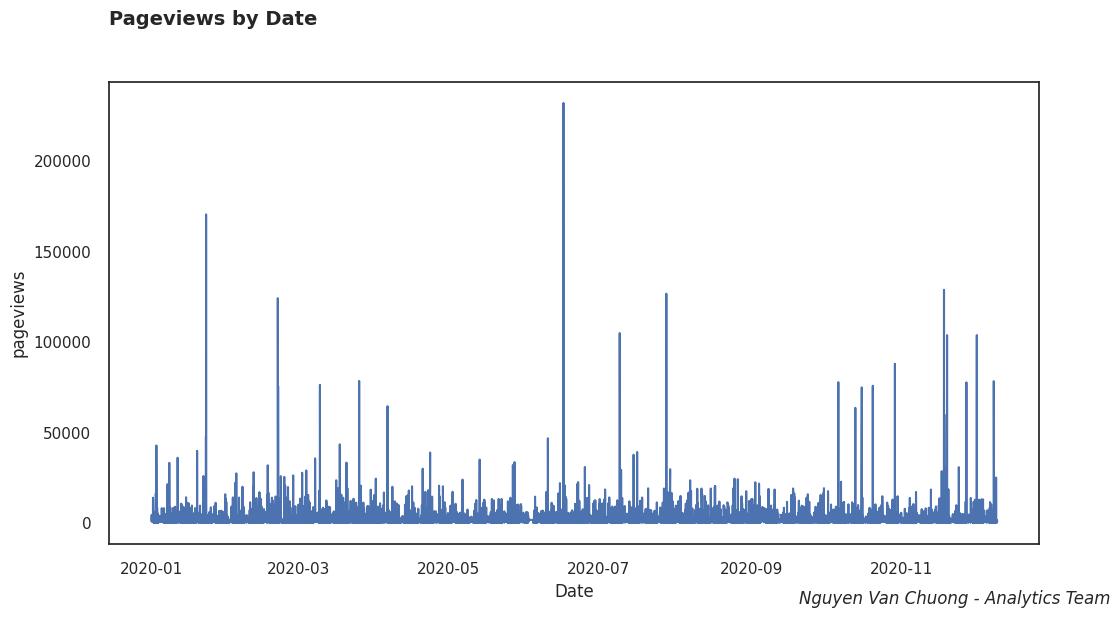

In [155]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traffics['Posted On (DD/MM/YYYY)'],traffics['pageviews'],)

# Adding title, label shafts and source:
plt.suptitle('Pageviews by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('pageviews', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

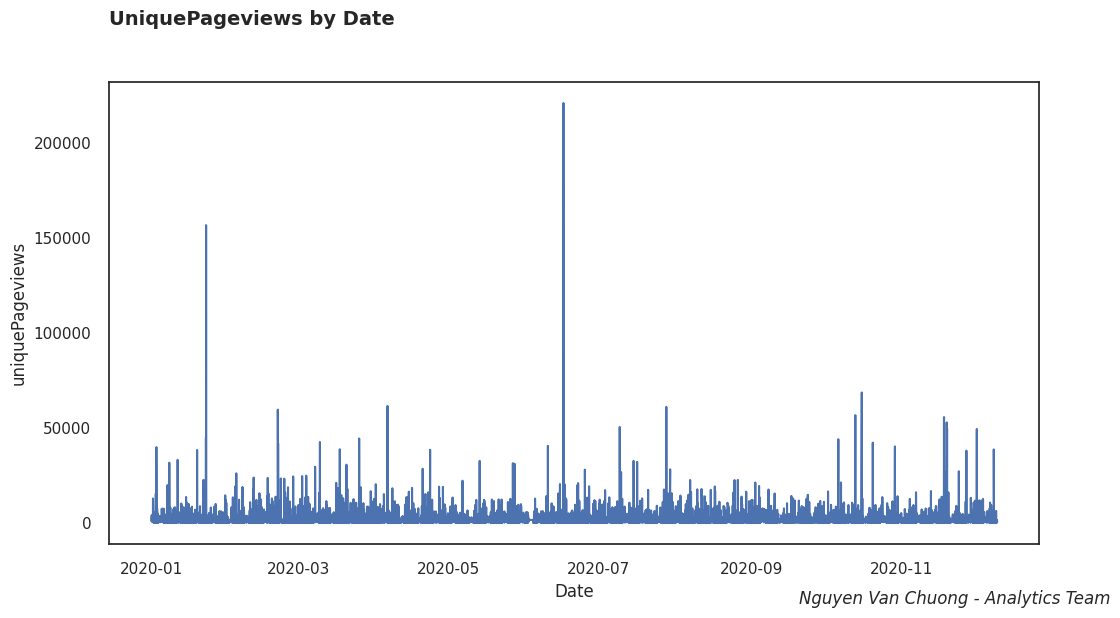

In [156]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traffics['Posted On (DD/MM/YYYY)'],traffics['uniquePageviews'],)

# Adding title, label shafts and source:
plt.suptitle('UniquePageviews by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('uniquePageviews', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

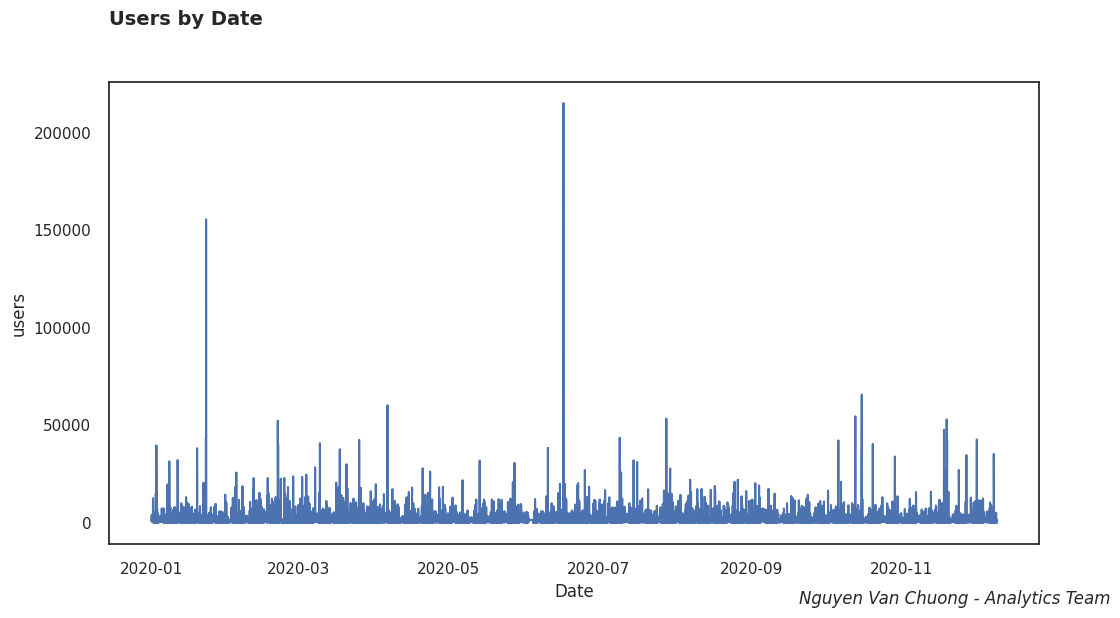

In [157]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(traffics['Posted On (DD/MM/YYYY)'],traffics['users'],)


# Adding title, label shafts and source:
plt.suptitle('Users by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Date', size=12)
plt.ylabel('users', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Conclusion:** Number of Users, UniquepageViews, PageViews tends to be unstable. And all three are not much different.

### Compare the number of orders, items and revenue between two channels: In Store and Online.


In [158]:
summarize_trans = data.groupby(["TransactionDate","Channel"]).\
                            agg(total_orders = ('OrderID','nunique'),total_items = ('ItemID','size'), total_revenue = ('SellPrice','sum')).\
                            reset_index()

In [159]:
summarize_trans

,TransactionDate,Channel,total_orders,total_items,total_revenue
0,2020-01-01,In Store,30,30,23820
1,2020-01-01,Online,35,36,32044
2,2020-01-02,In Store,33,33,24069
3,2020-01-02,Online,40,40,31612
4,2020-01-03,In Store,46,46,37118
...,...,...,...,...,...
643,2020-12-25,Online,43,43,31365
644,2020-12-26,In Store,28,28,23072
645,2020-12-26,Online,39,41,33473
646,2020-12-27,In Store,45,45,37629


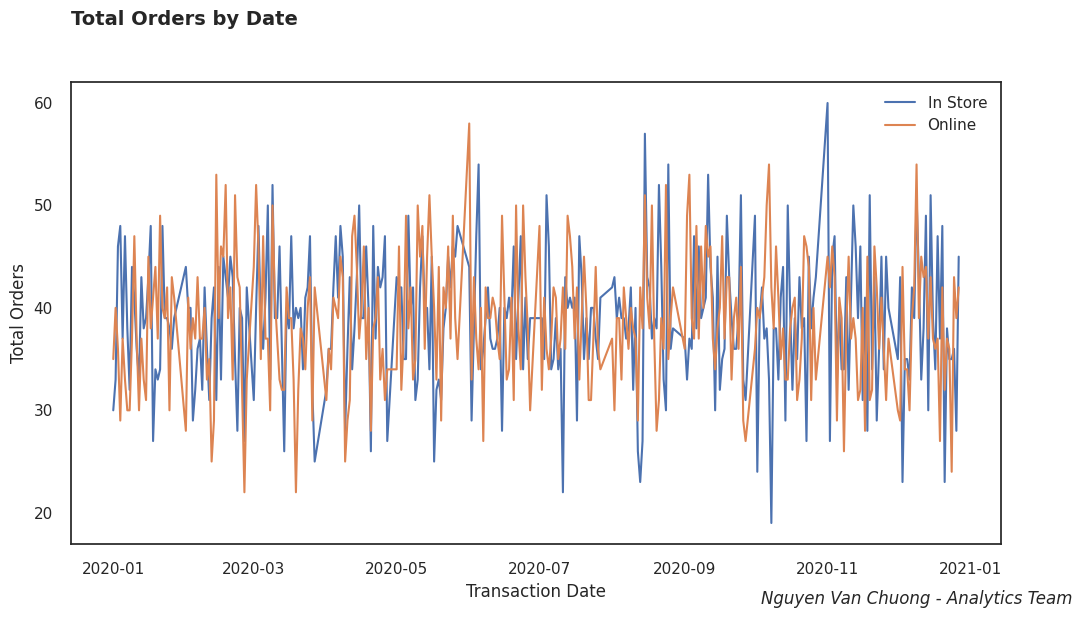

In [160]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summarize_trans[summarize_trans["Channel"] == "In Store"].TransactionDate,\
        summarize_trans[summarize_trans["Channel"] == "In Store"].total_orders, \
       label="In Store")

ax.plot(summarize_trans[summarize_trans["Channel"] == "Online"].TransactionDate,\
        summarize_trans[summarize_trans["Channel"] == "Online"].total_orders, \
       label="Online")

plt.legend()
# Adding title, label shafts and source:
plt.suptitle('Total Orders by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total Orders', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Conclusion:** there is no difference in the number of products sold by date through two online channels Online and In Store.

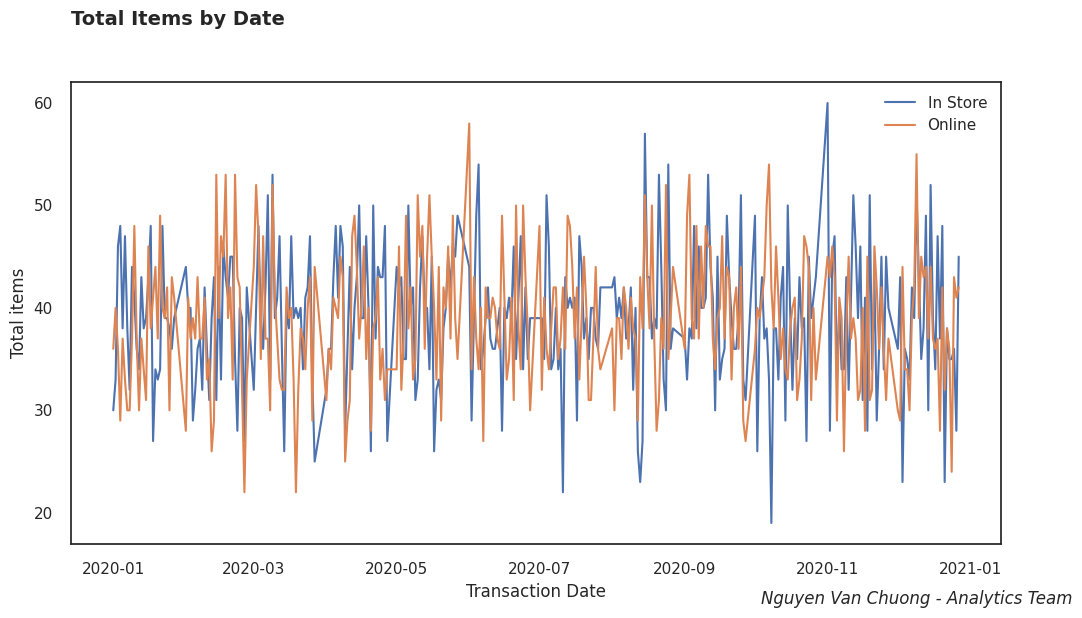

In [161]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summarize_trans[summarize_trans["Channel"] == "In Store"].TransactionDate,\
        summarize_trans[summarize_trans["Channel"] == "In Store"].total_items, \
       label="In Store")

ax.plot(summarize_trans[summarize_trans["Channel"] == "Online"].TransactionDate,\
        summarize_trans[summarize_trans["Channel"] == "Online"].total_items, \
       label="Online")

plt.legend()
# Adding title, label shafts and source:
plt.suptitle('Total Items by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total items', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


**Conclusion:** there is no difference in the number of items sold by date through two online channels Online and In Store.

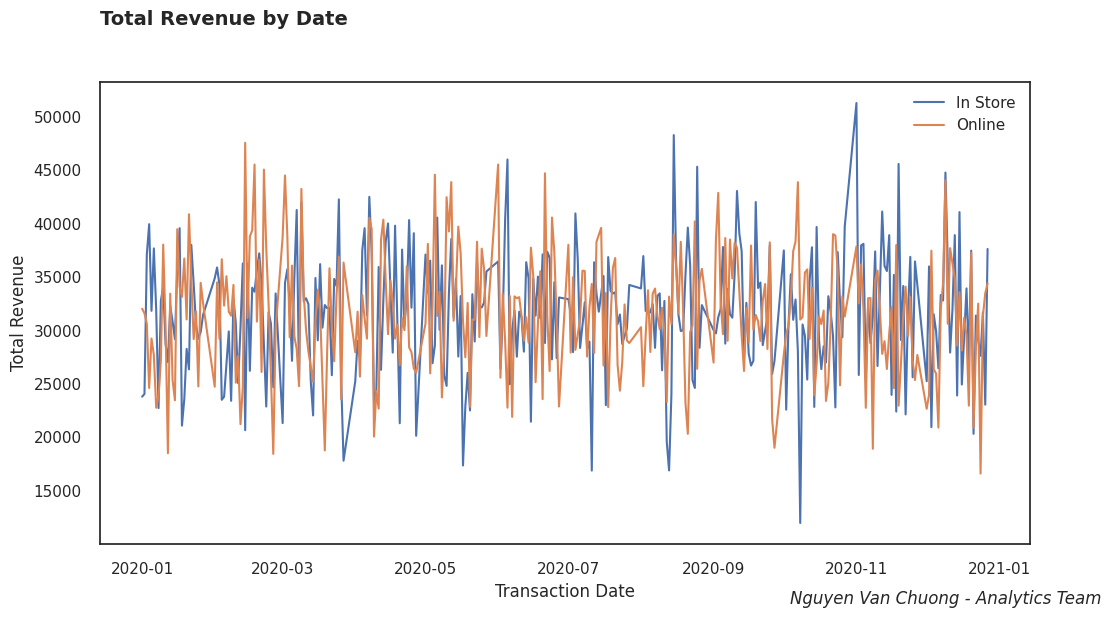

In [162]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(summarize_trans[summarize_trans["Channel"] == "In Store"].TransactionDate,\
        summarize_trans[summarize_trans["Channel"] == "In Store"].total_revenue, \
       label="In Store")

ax.plot(summarize_trans[summarize_trans["Channel"] == "Online"].TransactionDate,\
        summarize_trans[summarize_trans["Channel"] == "Online"].total_revenue, \
       label="Online")

plt.legend()
# Adding title, label shafts and source:
plt.suptitle('Total Revenue by Date', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.xlabel('Transaction Date', size=12)
plt.ylabel('Total Revenue', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Conclusion:** there is no difference in the number of revenue sold by date through two online channels Online and In Store.

**total_revenue & total_users**

In [163]:
revenue = data.groupby(["TransactionDate"], as_index=False)\
                        ["SellPrice"]\
                        .agg([np.sum]).reset_index().rename(columns={'sum':'total_revenue'})

In [164]:
revenue

,TransactionDate,total_revenue
0,2020-01-01,55864
1,2020-01-02,55681
2,2020-01-03,67753
3,2020-01-04,64573
4,2020-01-05,61098
...,...,...
319,2020-12-23,61634
320,2020-12-24,44266
321,2020-12-25,63062
322,2020-12-26,56545


In [165]:
traffics['Date'] = traffics['Posted On (DD/MM/YYYY)'].dt.date


In [166]:
traffics.head()

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),Product,Date
0,/2020/1/vanBip-on0.100834672919284,1034.8,1048.4,1134.4,"Vag9""-Z=gN30ND@[",2020-01-01 01:03:02,vanBip-on0.100834672919284,2020-01-01
1,/2020/1/fujBdence0.385183712192661,4097.8,4142.6,4457.2,ToOYo&o|?(;MH>V:,2020-01-01 01:46:40,fujBdence0.385183712192661,2020-01-01
2,/2020/1/baiXpsule0.236876019278184,642.6,653.8,726.8,PaasB'\_LlDEk`=W,2020-01-01 02:55:07,baiXpsule0.236876019278184,2020-01-01
3,/2020/1/artjriner0.183950395687591,3413.0,3469.6,3795.6,Ro7|R40![FY$PS`<,2020-01-01 04:18:00,artjriner0.183950395687591,2020-01-01
4,/2020/1/appMn-usd0.284138838758011,1447.0,1465.6,1562.6,MiUNo1$pZkrlcw>M,2020-01-01 04:35:14,appMn-usd0.284138838758011,2020-01-01


In [167]:
summarize_traffic = traffics.groupby(["Date"]).\
                            agg(total_users = ('users','sum'), total_uniquePageviews = ('uniquePageviews','sum'), total_pageviews = ('pageviews','sum')).\
                            reset_index()

In [168]:
summarize_traffic

,Date,total_users,total_uniquePageviews,total_pageviews
0,2020-01-01,63755.4,64814.8,70353.6
1,2020-01-02,111861.4,113640.0,122557.8
2,2020-01-03,63749.8,65175.4,71058.0
3,2020-01-04,13946.0,14274.6,15349.6
4,2020-01-05,47065.0,47856.6,51438.2
...,...,...,...,...
338,2020-12-05,23906.0,24678.8,27024.6
339,2020-12-06,25892.8,26517.0,28433.4
340,2020-12-07,95081.8,97565.0,105456.0
341,2020-12-08,100577.0,105419.6,150902.2


In [169]:
summarize_traffic['Date'] = pd.to_datetime(summarize_traffic['Date'])

In [170]:
revenue_traffic = revenue.merge(summarize_traffic,how='inner',left_on='TransactionDate', right_on='Date')

In [171]:
revenue_traffic

,TransactionDate,total_revenue,Date,total_users,total_uniquePageviews,total_pageviews
0,2020-01-01,55864,2020-01-01,63755.4,64814.8,70353.6
1,2020-01-02,55681,2020-01-02,111861.4,113640.0,122557.8
2,2020-01-03,67753,2020-01-03,63749.8,65175.4,71058.0
3,2020-01-04,64573,2020-01-04,13946.0,14274.6,15349.6
4,2020-01-05,61098,2020-01-05,47065.0,47856.6,51438.2
...,...,...,...,...,...,...
300,2020-12-05,55953,2020-12-05,23906.0,24678.8,27024.6
301,2020-12-06,47406,2020-12-06,25892.8,26517.0,28433.4
302,2020-12-07,65365,2020-12-07,95081.8,97565.0,105456.0
303,2020-12-08,67222,2020-12-08,100577.0,105419.6,150902.2


In [172]:
revenue_traffic.drop('Date', inplace=True, axis=1)
revenue_traffic

,TransactionDate,total_revenue,total_users,total_uniquePageviews,total_pageviews
0,2020-01-01,55864,63755.4,64814.8,70353.6
1,2020-01-02,55681,111861.4,113640.0,122557.8
2,2020-01-03,67753,63749.8,65175.4,71058.0
3,2020-01-04,64573,13946.0,14274.6,15349.6
4,2020-01-05,61098,47065.0,47856.6,51438.2
...,...,...,...,...,...
300,2020-12-05,55953,23906.0,24678.8,27024.6
301,2020-12-06,47406,25892.8,26517.0,28433.4
302,2020-12-07,65365,95081.8,97565.0,105456.0
303,2020-12-08,67222,100577.0,105419.6,150902.2


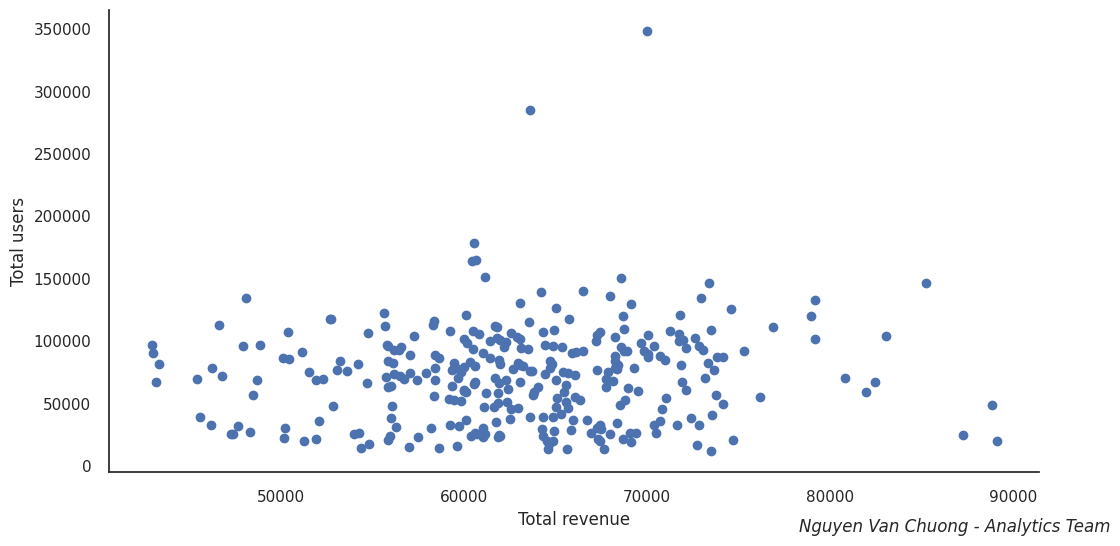

In [173]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(revenue_traffic['total_revenue'],revenue_traffic['total_users'])

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

plt.xlabel('Total revenue', size=12)
plt.ylabel('Total users', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [174]:
pearson_coef, p_value = stats.pearsonr(revenue_traffic['total_revenue'], revenue_traffic['total_users'])
print("Correlation Coefficient is", pearson_coef.round(3))
print("Values P-value is ", p_value.round(3))

Correlation Coefficient is 0.076
Values P-value is  0.184


**Conclusion:** Total_revenue and Total_users are not correlated with each other.

**total_revenue & total_uniquePageviews**

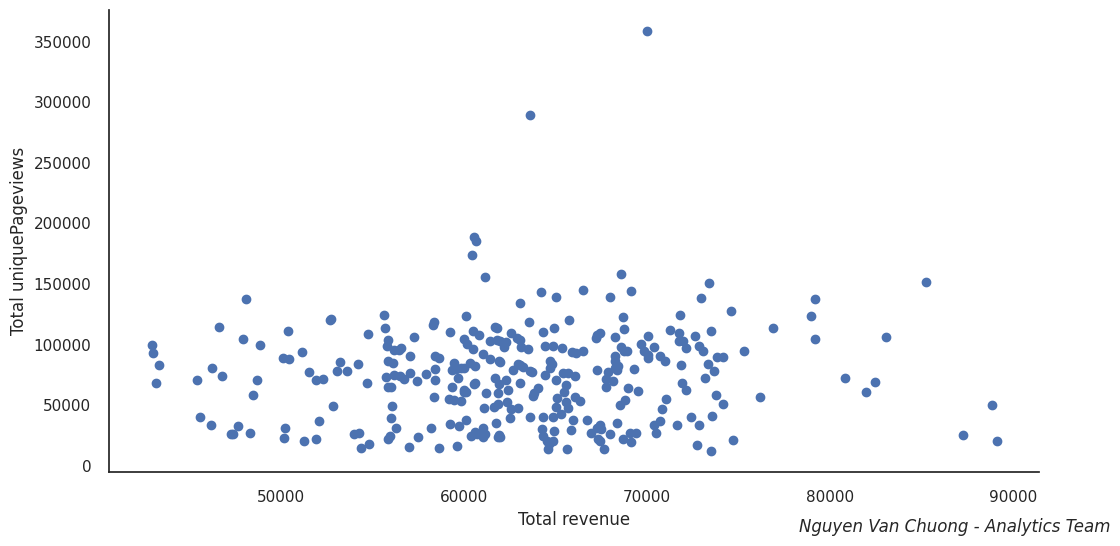

In [175]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(revenue_traffic['total_revenue'],revenue_traffic['total_uniquePageviews'])

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

plt.xlabel('Total revenue', size=12)
plt.ylabel('Total uniquePageviews', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [176]:
pearson_coef, p_value = stats.pearsonr(revenue_traffic['total_revenue'], revenue_traffic['total_uniquePageviews'])
print("Correlation Coefficient is", pearson_coef.round(3))
print("Values P-value is ", p_value.round(3))

Correlation Coefficient is 0.076
Values P-value is  0.188


**Conclusion:** Total_revenue and Total_users are not correlated with each other.

**total_revenue & total_pageviews**

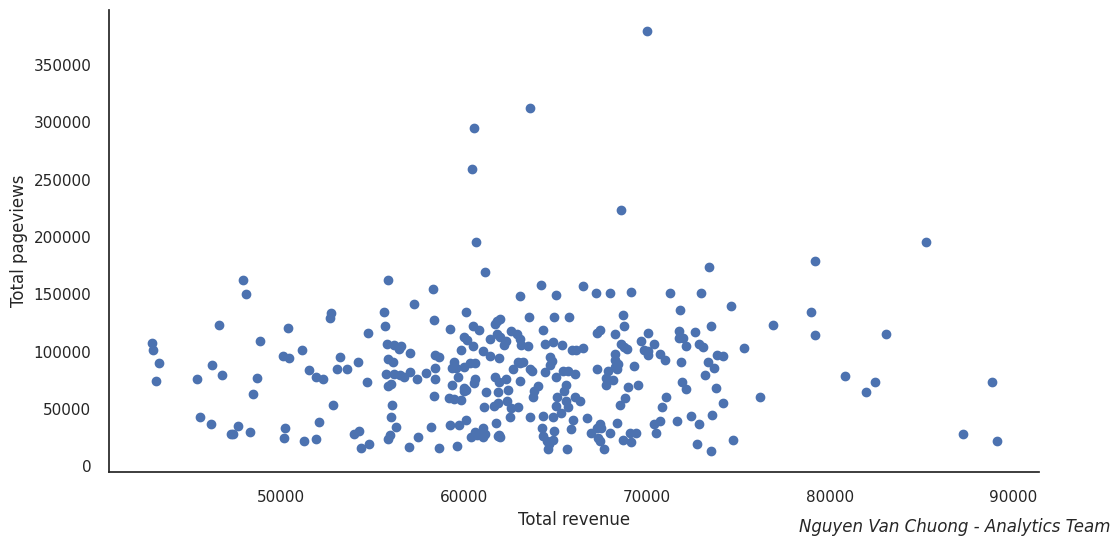

In [177]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(revenue_traffic['total_revenue'],revenue_traffic['total_pageviews'])

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

plt.xlabel('Total revenue', size=12)
plt.ylabel('Total pageviews', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [178]:
pearson_coef, p_value = stats.pearsonr(revenue_traffic['total_revenue'], revenue_traffic['total_pageviews'])
print("Correlation Coefficient is", pearson_coef.round(3))
print("Values P-value is ", p_value.round(3))

Correlation Coefficient is 0.075
Values P-value is  0.189


**Conclusion**: Total_revenue and Total_pageViews are not correlated with each other.

**Answer to Question 1:** There are no factors in website traffic data that impact revenue.

## Which products get us pageviews and revenue?



### Top 10 products bring the highest pageviews.

In [179]:
pageviews = traffics.groupby(["Brand","Product"]).agg(total_pageviews = ('pageviews','sum')).reset_index()

In [180]:
pageviews.sort_values('total_pageviews', ascending=False, inplace=True, ignore_index=True)

In [181]:
pageviews.head(10)

,Brand,Product,total_pageviews
0,So)zm5Pl^_G5t?q,sonEies-x0.139039192479287,232177.0
1,"Ac8IJsKH,4xtY.Tk",porQlease0.507911745358356,170599.0
2,PU]vXmX9fgf$xf!/,pumMvideo0.837931992780922,128891.8
3,BajeQM&IzKX.a8&_,besfeek-50.280274313298435,126771.0
4,LaX{ty9j_zZdD-\`,rogLrecap0.644396392507623,124284.2
5,Stc\9>Cqq;Rn&/|F,jefXaunch0.410067394635876,104984.2
6,"Ch6hNzXa,'=Q=)Wi",chrL-york0.372865344640649,103863.4
7,Wrv1Qv~}Dk7@']x3,wradaunch0.370927222684073,103850.0
8,An1a]{mE?nl\sM%&,angztered0.926486710136623,87999.6
9,Ai/cV(XG>`JN2Ln,goa]akers0.899516668943853,78523.6


In [182]:
top10_highestViews = pageviews.head(10).copy()

In [183]:
top10_highestViews.sort_values('total_pageviews', ascending=True, inplace=True, ignore_index=True)

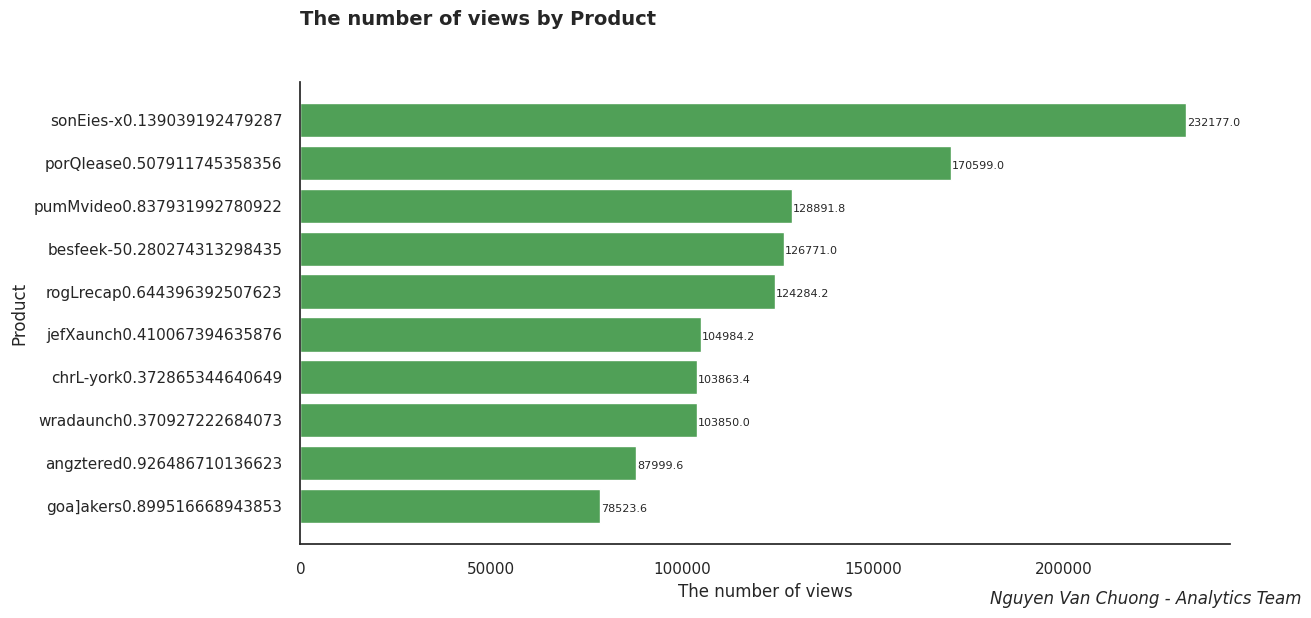

In [184]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_highestViews['Product'],top10_highestViews['total_pageviews'],data=top10_highestViews,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_highestViews.total_pageviews[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1

# Remove the line above and to the right of chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# Remove ticks on 2 axes
ax.tick_params(left=False, bottom=False)

# Add title, label the axes and source:
plt.suptitle('The number of views by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('The number of views', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

### Top 10 products bring the lowest pageviews.

In [185]:
top10_lowestViews = pageviews.tail(15).copy().reset_index()


In [186]:
top10_lowestViews

,index,Brand,Product,total_pageviews
0,17874,Al_w1b7Rgo1[d5(t,wifHtream0.917888669521799,10.8
1,17875,Nes[8ukT8KBR8yVs,aur`bdrab0.327125310437019,10.8
2,17876,"BrDD!7Yg@jc""uls8",braBatter0.0782377325420137,8.0
3,17877,NiPea$n|Eu@<@>'L,nikklease0.491245756144684,5.6
4,17878,AmN]c$u[M;A^YJcU,in-Oaunch0.163562275754465,2.0
5,17879,Ma?Mwli9eyEN''@w,maju-date0.799046146817876,2.0
6,17880,Un3Iq;#h/1zA_`s?,undjcline0.806504582435603,1.8
7,17881,"Ve""""8X{n*HPW!bil",a-cClease0.167928605630817,1.6
8,17882,Ap!FulqmT[82a2/E,facQ-rise0.00977738420521201,0.8
9,17883,Yu%jaXeE/8L$d$yX,yunsement0.44148099082229,0.6


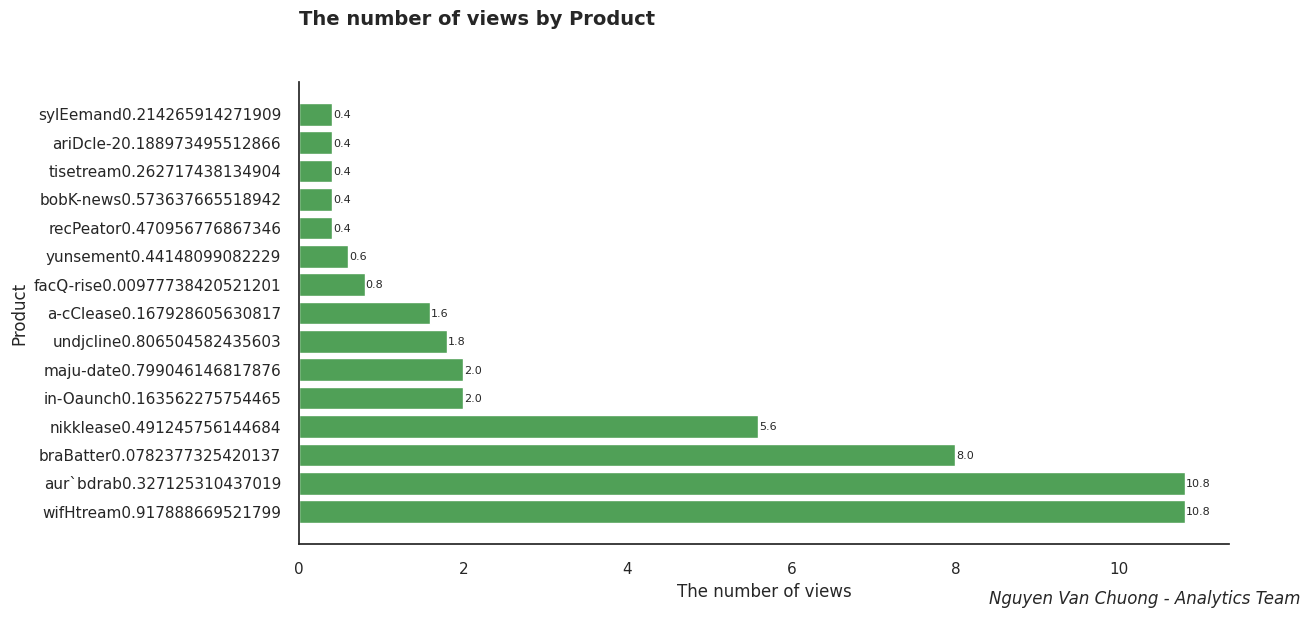

In [187]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_lowestViews['Product'],top10_lowestViews['total_pageviews'],data=top10_lowestViews,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_lowestViews.total_pageviews[i], xy=(p.get_width()+0.01, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1

# remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False)

# Add title, label the axes and source:
plt.suptitle('The number of views by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('The number of views', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

### Top 10 products bring the highest revenue.

In [188]:
revenue = data.groupby(["Brand","Product"]).agg(total_revenue = ('SellPrice','sum')).reset_index()


In [189]:
revenue.sort_values('total_revenue', ascending=False, inplace=True, ignore_index=True)


In [190]:
revenue.head(10)


,Brand,Product,total_revenue
0,Il^(xPdB:S`#irqz,hypsrview0.321288570724117,11556
1,"Relp\+KJ?D,cWw0P",reeelease0.452821711209563,9205
2,"Ac8IJsKH,4xtY.Tk",audE-info0.884915261087885,8428
3,DiCo4(99zZ<nkafj,kinv-news0.29905739542661,7980
4,YMbpE$ev3qMx-h*E,ymc_orson0.319251813809483,7794
5,"BMh._Fx~""+dbZy|,",bmwk-20210.31690704020655,7686
6,Ap8r`F[}sfP_x007f_->SZ,ubeYanada0.100113795307302,7552
7,go@c<p.bPWb1nLrF,titM-info0.550757203954225,7520
8,Sa?9zXUH5iJbuE'S,samLement0.78565851365938,7518
9,DiL%1<G?YSFM_/TR,dioa-info0.750756927974235,7422


In [191]:
top10_highestRevenue = revenue.head(15).copy()


In [192]:
top10_highestRevenue.sort_values('total_revenue', ascending=True, inplace=True, ignore_index=True)


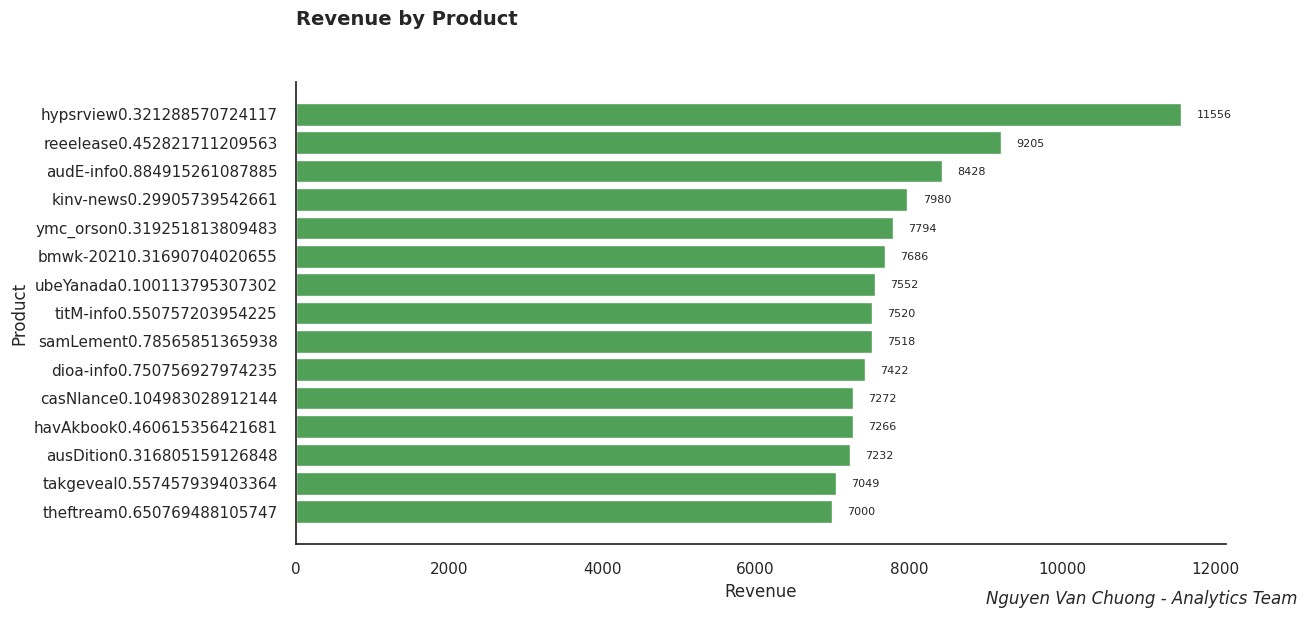

In [193]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_highestRevenue['Product'],top10_highestRevenue['total_revenue'],data=top10_highestRevenue,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_highestRevenue.total_revenue[i], xy=(p.get_width()+200, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1

# remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False)

# Add title, label the axes and source:
plt.suptitle('Revenue by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Revenue', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


### Top 10 products bring the lowest revenue.

In [194]:
top10_lowestRevenue = revenue.tail(10).copy().reset_index()


In [195]:
top10_lowestRevenue


,index,Brand,Product,total_revenue
0,13532,LoohpaJQ$v?;1-0b,polWkbook0.608294655546041,81
1,13533,Te/6_R<*I)Fc!@S:,teertream0.435511384141963,81
2,13534,Ap!FulqmT[82a2/E,secD-info0.408433946152434,78
3,13535,Ca@]7ed?aB@_Sdw(,canuement0.946238211030094,77
4,13536,Te-'32vNJ;E#BvCC,tenHx-toy0.234647410327591,74
5,13537,Bedz04LN6g4NY{R5,2g-aation0.859210237517232,72
6,13538,Br0Aza@`0k<LPOVi,g-hxrowns0.35584537222102,69
7,13539,Levk)A7u]J|c_tFD,legX-info0.422268138697415,63
8,13540,Lo:}7^:YFSc4xYIs,umaZction0.0701712715774042,60
9,13541,Wae3Jy6[wA3Y#k7h,wacNkbook0.849290713312118,46


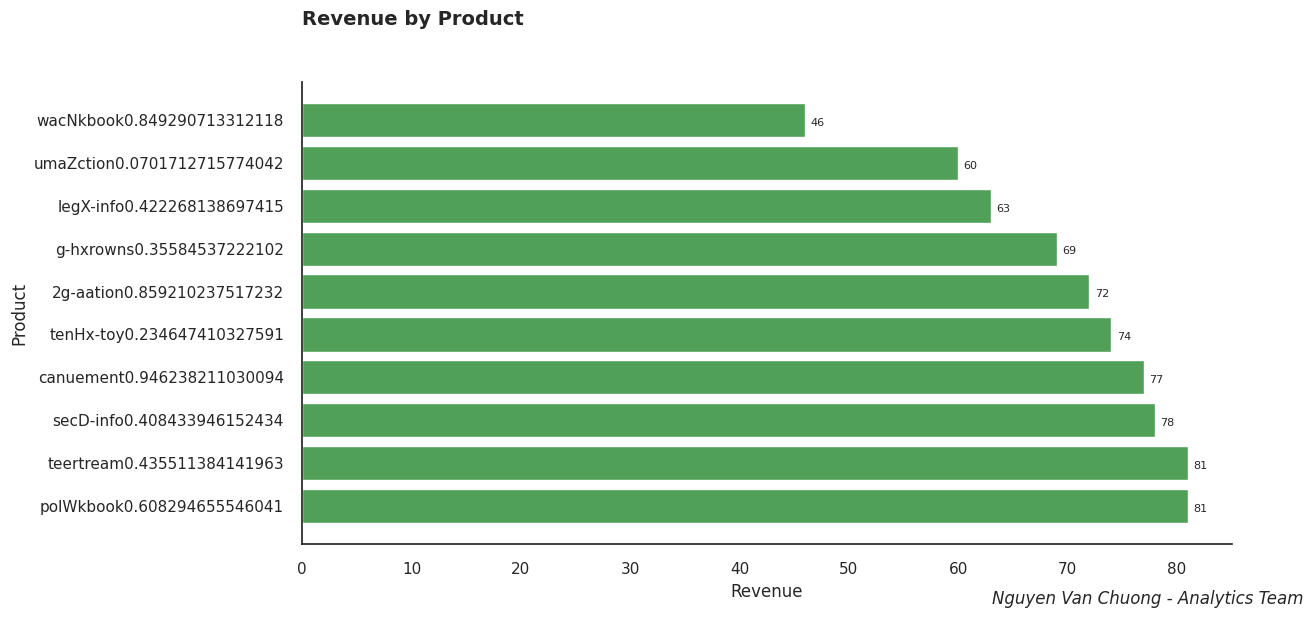

In [196]:
# plot
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.barh(top10_lowestRevenue['Product'],top10_lowestRevenue['total_revenue'],data=top10_lowestRevenue,color='#50a057')

# Show data
i = 0
for p in bar1.patches:
    t1 = ax.annotate(top10_lowestRevenue.total_revenue[i], xy=(p.get_width()+0.5, p.get_y()+p.get_height()/3))
    t1.set(size=8)
    i+=1

# remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

# remove ticks on 2 axes
ax.tick_params(left=False, bottom=False)

# Add title, label the axes and source:
plt.suptitle('Revenue by Product', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Revenue', size=12)
plt.ylabel('Product', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()


### Correlation between revenue and pageviews.

In [197]:
item_revenue = data.groupby(['Brand', 'Product']).agg(total_revenue = ('SellPrice','sum')).reset_index()
item_revenue


,Brand,Product,total_revenue
0,!lMifo~0~N65rM}2,skyK-date0.237469692167954,2715
1,#B_-`aDe`}CVt'!A,18-`lease0.952310074301681,478
2,#B_-`aDe`}CVt'!A,202rvideo0.0198947312483128,392
3,#B_-`aDe`}CVt'!A,6layenter0.832904875099387,1986
4,#B_-`aDe`}CVt'!A,a-cPrants0.941652415797535,1384
...,...,...,...
13537,"ze\yQP9Ju,s(O|>]",zel`video0.809705577564763,332
13538,"ze\yQP9Ju,s(O|>]",zelkvideo0.542849205536647,1052
13539,"ze\yQP9Ju,s(O|>]",zeloalbum0.673018009367897,3234
13540,Ét2:1))2]qB2`9;^,etua-baby0.472156023137423,1048


In [198]:
item_revenue.total_revenue.describe()

count    13542.000000
mean      1507.695909
std       1096.691381
min         46.000000
25%        742.000000
50%       1186.000000
75%       2042.750000
max      11556.000000
Name: total_revenue, dtype: float64

In [199]:
# Rank the levels of the total revenue based on the Q1, IQR, Q2
conditions = [(item_revenue['total_revenue'] < 742), \
            (item_revenue['total_revenue'] >= 742) & (item_revenue['total_revenue'] < 1186), \
            (item_revenue['total_revenue'] >= 1186) & (item_revenue['total_revenue'] < 2042), \
            (item_revenue['total_revenue'] >= 2042)]

values = ['Low', 'Medium', 'High', 'Very High']

item_revenue['ranking_revenue'] = np.select(conditions, values)


In [200]:
traffic_pageviews = traffics.groupby(['Brand', 'Product']).agg(pageviews = ('pageviews', 'sum')).reset_index()
traffic_pageviews

,Brand,Product,pageviews
0,!lMifo~0~N65rM}2,skyK-date0.237469692167954,102.0
1,#B_-`aDe`}CVt'!A,18-`lease0.952310074301681,1268.0
2,#B_-`aDe`}CVt'!A,202rvideo0.0198947312483128,113.2
3,#B_-`aDe`}CVt'!A,6layenter0.832904875099387,291.0
4,#B_-`aDe`}CVt'!A,8dixshirt0.0946466352557199,309.0
...,...,...,...
17884,"ze\yQP9Ju,s(O|>]",zeloalbum0.673018009367897,17.6
17885,Ét2:1))2]qB2`9;^,etua-baby0.472156023137423,1291.8
17886,Ét2:1))2]qB2`9;^,etujation0.0817298363167827,136.2
17887,Ét2:1))2]qB2`9;^,etuqt-day0.117221119496646,486.0


In [201]:
traffic_pageviews['pageviews'].describe()

count     17889.000000
mean       1592.936453
std        4412.133767
min           0.400000
25%         358.800000
50%         683.600000
75%        1499.800000
max      232177.000000
Name: pageviews, dtype: float64

In [202]:
# Rank the levels of the pageviews based on the Q1, IQR, Q2
condition = [(traffic_pageviews['pageviews'] < 358), \
            (traffic_pageviews['pageviews'] >= 358) & (traffic_pageviews['pageviews'] < 683), \
            (traffic_pageviews['pageviews'] >= 683) & (traffic_pageviews['pageviews'] < 1499), \
            (traffic_pageviews['pageviews'] >= 1499)]

value = ['Low', 'Medium', 'High', 'Very High']

traffic_pageviews['Ranking_pageviews'] = np.select(condition, value)

In [203]:
# Merge data
revenue_pageviews = item_revenue.merge(traffic_pageviews, left_on = ['Product', 'Brand'], right_on = ['Product', 'Brand'])
revenue_pageviews.sort_values(['pageviews', 'total_revenue'], ascending = False)

,Brand,Product,total_revenue,ranking_revenue,pageviews,Ranking_pageviews
532,"Ac8IJsKH,4xtY.Tk",porQlease0.507911745358356,2714,Very High,170599.0,Very High
8220,PU]vXmX9fgf$xf!/,pumMvideo0.837931992780922,3960,Very High,128891.8,Very High
1747,BajeQM&IzKX.a8&_,besfeek-50.280274313298435,2748,Very High,126771.0,Very High
5308,LaX{ty9j_zZdD-\`,rogLrecap0.644396392507623,1197,High,124284.2,Very High
9849,Stc\9>Cqq;Rn&/|F,jefXaunch0.410067394635876,484,Low,104984.2,Very High
...,...,...,...,...,...,...
11501,Yu%jaXeE/8L$d$yX,yunsement0.44148099082229,1128,Medium,0.6,Low
8103,OlDe}#G)yIt'+Bc3,recPeator0.470956776867346,3340,Very High,0.4,Low
10425,Tir72~+xaqy!(G\-,tisetream0.262717438134904,901,Medium,0.4,Low
278,"Ac8IJsKH,4xtY.Tk",bobK-news0.573637665518942,870,Medium,0.4,Low


In [204]:
# The products are both high-ranking_revenue and low-ranking_pageviews.
revenue_pageviews[(revenue_pageviews['ranking_revenue'] == 'Very High') & (revenue_pageviews['Ranking_pageviews'] == 'Low')]\
                                                .sort_values(['total_revenue', 'pageviews'], ascending = False)

,Brand,Product,total_revenue,ranking_revenue,pageviews,Ranking_pageviews
8983,"Relp\+KJ?D,cWw0P",reeelease0.452821711209563,9205,Very High,281.8,Low
11458,YMbpE$ev3qMx-h*E,ymc_orson0.319251813809483,7794,Very High,223.2,Low
3288,Exa~e4sZi*|fpD<^,ausDition0.316805159126848,7232,Very High,161.4,Low
6153,Mi+QB'FqF;cGT)Y',theftream0.650769488105747,7000,Very High,350.2,Low
8787,Ra&3X!d15ID^=sus,raejement0.618482160856154,6860,Very High,342.4,Low
...,...,...,...,...,...,...
10209,"Th/mp_89*Fq},z40",theZg-ito0.351036960583246,2050,Very High,353.6,Low
5570,Lo:}7^:YFSc4xYIs,ireM-news0.257234450575393,2048,Very High,243.6,Low
5367,Le[cbuI/Q[BdoWvx,a-ng-info0.0548323007969564,2046,Very High,304.8,Low
4226,He@H.e{jPXaUHUF(,hers-20200.0596337799394938,2044,Very High,234.4,Low


In [205]:
# The products are both low-ranking_revenue and high-ranking_pageviews.
revenue_pageviews[(revenue_pageviews['ranking_revenue'] == 'Low') & (revenue_pageviews['Ranking_pageviews'] == 'Very High')]\
                                                .sort_values(['total_revenue', 'pageviews'], ascending = False)

,Brand,Product,total_revenue,ranking_revenue,pageviews,Ranking_pageviews
10625,Tr1)L/A]=of['Qhn,chaPtopia0.305759133071658,741,Low,1906.0,Very High
11872,ad(;%f6iD'}9EHD[,whil-info0.511259246630254,741,Low,1737.6,Very High
1308,Ap!FulqmT[82a2/E,youTcture0.944314892191284,740,Low,3566.4,Very High
7750,NiPea$n|Eu@<@>'L,niku5-3000.815662316070307,740,Low,2231.6,Very High
7475,NiPea$n|Eu@<@>'L,nik\-info0.17636213285294,740,Low,2175.4,Very High
...,...,...,...,...,...,...
3054,Dr|vm[-5p~56Y\mk,dj-lement0.523355253367032,103,Low,2536.6,Very High
2581,Coi%hNfxcpJXpz^s,besAniche0.0507720075601127,92,Low,1586.0,Very High
1300,Ap!FulqmT[82a2/E,secD-info0.408433946152434,78,Low,6494.4,Very High
10126,Te-'32vNJ;E#BvCC,tenHx-toy0.234647410327591,74,Low,2217.4,Very High


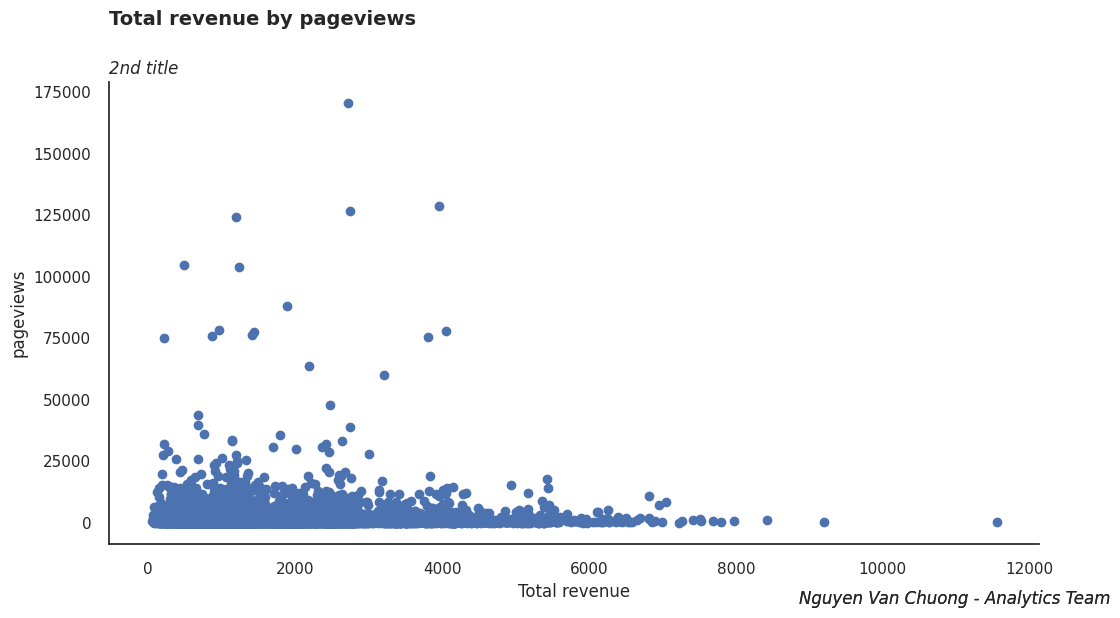

In [206]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.scatter(revenue_pageviews['total_revenue'],revenue_pageviews['pageviews'])

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

plt.xlabel('total_revenue', size=12)
plt.ylabel('pageviews', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

# Add title, label the axes and source:
plt.suptitle('Total revenue by pageviews', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('Total revenue', size=12)
plt.ylabel('pageviews', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [207]:
pearson_coef, p_value = stats.pearsonr(revenue_pageviews['total_revenue'], revenue_pageviews['pageviews'])
print("Correlation Coefficient is", pearson_coef.round(3))
print("Values P-value is ", p_value.round(3))

Correlation Coefficient is 0.016
Values P-value is  0.07


## What customer segments are there?    


In [208]:
#
customer_data = data.groupby(["CustomerID","FirstName", "LastName","Country","Birthday","DateJoined","Newsletter"]).\
                            agg(total_expenditures = ('SellPrice','sum')).\
                            reset_index()

In [209]:
customer_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures
0,0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029
...,...,...,...,...,...,...,...,...
765,765,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,29538
766,766,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,1965-07-25,2016-09-05,Y,5331
767,767,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,45470
768,768,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,35462


In [210]:

today = date.today()

# Calculate age
customer_data['Age'] = range(len(customer_data['Birthday']))
for i in range(len(customer_data['Birthday'])):
    customer_data['Age'][i] = today.year - customer_data['Birthday'][i].year

# Calculate Loyalty
customer_data['Loyalty'] = range(len(customer_data['DateJoined']))
for i in range(len(customer_data['DateJoined'])):
    customer_data['Loyalty'][i] = today.year - customer_data['DateJoined'][i].year

<ipython-input-210-1c69ac89a0bb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Age'][i] = today.year - customer_data['Birthday'][i].year
<ipython-input-210-1c69ac89a0bb>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['Loyalty'][i] = today.year - customer_data['DateJoined'][i].year


In [211]:
customer_data

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures,Age,Loyalty
0,0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997,55,8
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948,14,8
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879,33,8
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603,49,8
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029,42,8
...,...,...,...,...,...,...,...,...,...,...
765,765,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,29538,34,7
766,766,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,1965-07-25,2016-09-05,Y,5331,58,7
767,767,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,45470,43,7
768,768,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,35462,43,7


In [212]:
customer_seg = customer_data.merge(customer_info[['ID','Gender']],how='inner',left_on='CustomerID', right_on='ID')


In [213]:
customer_seg.drop('ID', inplace=True, axis=1)


In [214]:
customer_seg

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures,Age,Loyalty,Gender
0,0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997,55,8,NaN
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948,14,8,M
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879,33,8,F
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603,49,8,M
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029,42,8,M
...,...,...,...,...,...,...,...,...,...,...,...
765,765,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,1989-10-25,2016-09-05,N,29538,34,7,F
766,766,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,1965-07-25,2016-09-05,Y,5331,58,7,NaN
767,767,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,1980-11-07,2016-09-05,Y,45470,43,7,M
768,768,Y0.286774649994125,Aung0.752567424443609,GER - Germany,1980-09-17,2016-09-05,Y,35462,43,7,M


### The expenditures of the customer by country.

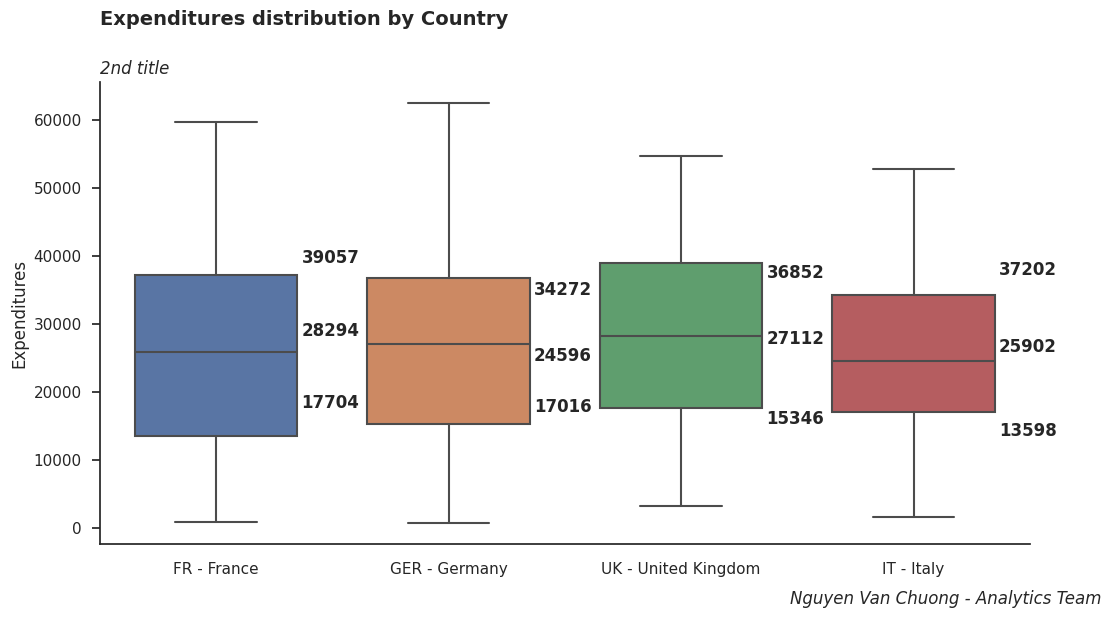

In [215]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style("white")

# calculate the median, q1, q3, min, max indexes on the chart
median_list = customer_seg.groupby('Country')['total_expenditures'].median()
q1_list = customer_seg.groupby('Country')['total_expenditures'].quantile(0.25)
q3_list = customer_seg.groupby('Country')['total_expenditures'].quantile(0.75)
min_list = customer_seg.groupby('Country')['total_expenditures'].min()
max_list = customer_seg.groupby('Country')['total_expenditures'].max()

# plot boxplot
box_width=0.7
box1 = sns.boxplot(x='Country', y='total_expenditures', data=customer_seg, width=box_width)

# show data
# show medians
i = 0
for i in range(len(median_list)):
    x = i+box_width/2*1.05
    y = median_list[len(median_list)-i-1]
    box1.annotate('%.0f' %median_list[len(median_list)-i-1], # do median_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
# show q1
i = 0
for i in range(len(q1_list)):
    x = i+box_width/2*1.05
    y = q1_list[len(q1_list)-i-1]
    box1.annotate('%.0f' %q1_list[len(q1_list)-i-1], # do q1_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )

# show q3
i = 0
for i in range(len(q3_list)):
    x = i+box_width/2*1.05
    y = q3_list[len(q3_list)-i-1]
    box1.annotate('%.0f' %q3_list[len(q3_list)-i-1], # do q3_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )

# Remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    box1.spines[s].set_visible(False)


# Remove the tick on the x.axis
box1.tick_params(left=True, bottom=False)

# Add title, label the axes and source:
plt.suptitle('Expenditures distribution by Country', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('', size=12)
plt.ylabel('Expenditures', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Conclusion:** All four capitals have spending levels ranging from over 10,000(USD) to nearly 40,000(USD). At the same time, there is no much difference in spending levels between these four capitals and there are no outliers.

## The expenditures of the customer by gender.

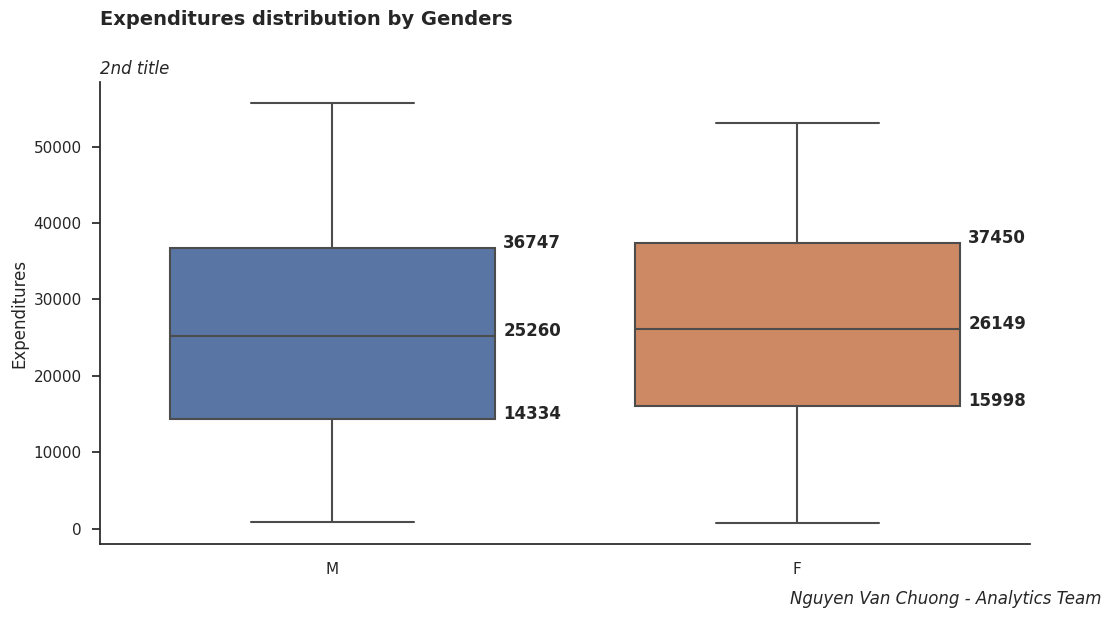

In [216]:
sns.set(rc={'figure.figsize':(12, 6)})
sns.set_style("white")

# Calculated indexes median, q1, q3, min, max to chart
median_list = customer_seg.groupby('Gender')['total_expenditures'].median()
q1_list = customer_seg.groupby('Gender')['total_expenditures'].quantile(0.25)
q3_list = customer_seg.groupby('Gender')['total_expenditures'].quantile(0.75)
min_list = customer_seg.groupby('Gender')['total_expenditures'].min()
max_list = customer_seg.groupby('Gender')['total_expenditures'].max()

# Draw boxplot
box_width=0.7
box1 = sns.boxplot(x='Gender', y='total_expenditures', data=customer_seg, width=box_width)

# show data
# show medians
i = 0
for i in range(len(median_list)):
    x = i+box_width/2*1.05
    y = median_list[len(median_list)-i-1]
    box1.annotate('%.0f' %median_list[len(median_list)-i-1], # do median_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )
# show q1
i = 0
for i in range(len(q1_list)):
    x = i+box_width/2*1.05
    y = q1_list[len(q1_list)-i-1]
    box1.annotate('%.0f' %q1_list[len(q1_list)-i-1], # do q1_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )

# show q3
i = 0
for i in range(len(q3_list)):
    x = i+box_width/2*1.05
    y = q3_list[len(q3_list)-i-1]
    box1.annotate('%.0f' %q3_list[len(q3_list)-i-1], # do q3_list thứ tự giá trị group_var ngược so với plot nên phải index như vậy
                  (x,y),
                  #color='white',
                  weight='semibold',
                  size=12
                 )

# remove the line above and to the right of the chart
spines = ['top', 'right']
for s in spines:
    box1.spines[s].set_visible(False)

# Remove the tick on the x.axis
box1.tick_params(left=True, bottom=False)

# Add title, label the axes and source:
plt.suptitle('Expenditures distribution by Genders', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('', size=12)
plt.ylabel('Expenditures', size=12)
plt.text(0.7, 0.01, "Nguyen Van Chuong - Analytics Team", style='italic',transform=plt.gcf().transFigure)

plt.show()

**Conclusion:** The two genders have spending levels ranging from over 14,000(USD) to nearly 38,000(USD). At the same time, there is no much difference in spending levels between these two genders and there are no outliers.

In [217]:
segment = customer_seg.copy()
segment.head(5)

,CustomerID,FirstName,LastName,Country,Birthday,DateJoined,Newsletter,total_expenditures,Age,Loyalty,Gender
0,0,V0.296680287495188,L0.104646531512644,FR - France,1968-02-03,2015-12-18,N,32997,55,8,NaN
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2009-10-06,2015-12-21,Y,34948,14,8,M
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,1990-08-04,2015-12-22,Y,17879,33,8,F
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,1974-07-24,2015-12-22,N,14603,49,8,M
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,1981-08-13,2015-12-22,N,37029,42,8,M


In [218]:
data_set = segment.iloc[:,[7,8]]
data_set

,total_expenditures,Age
0,32997,55
1,34948,14
2,17879,33
3,14603,49
4,37029,42
...,...,...
765,29538,34
766,5331,58
767,45470,43
768,35462,43


## Standardization


In [219]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_set)

In [220]:
data_set

,total_expenditures,Age
0,32997,55
1,34948,14
2,17879,33
3,14603,49
4,37029,42
...,...,...
765,29538,34
766,5331,58
767,45470,43
768,35462,43


## Build model

### elbow test

In [221]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

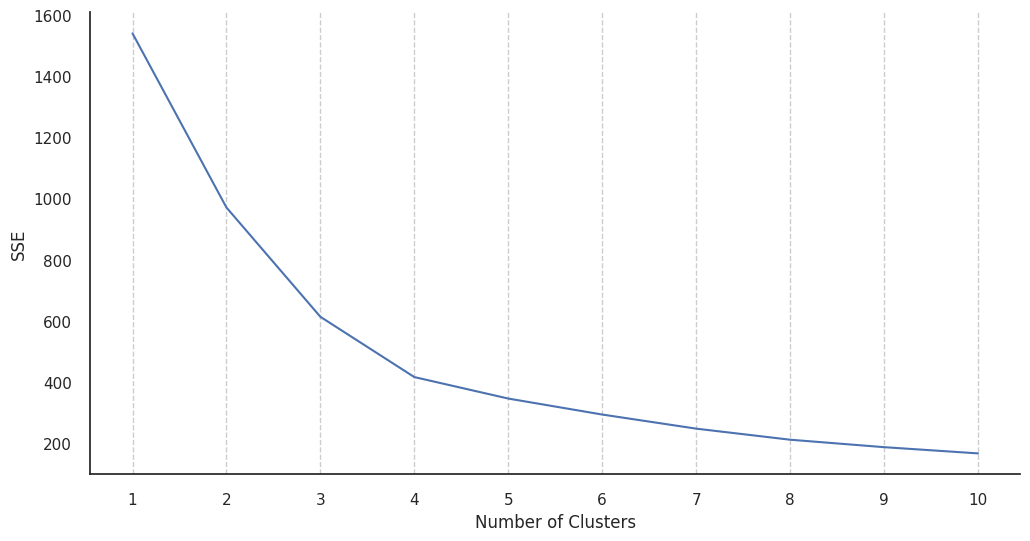

In [222]:
#plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(1, 11), sse)

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)


ax.xaxis.grid(linestyle='dashed')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [223]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

### silhouette coefficient

In [224]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

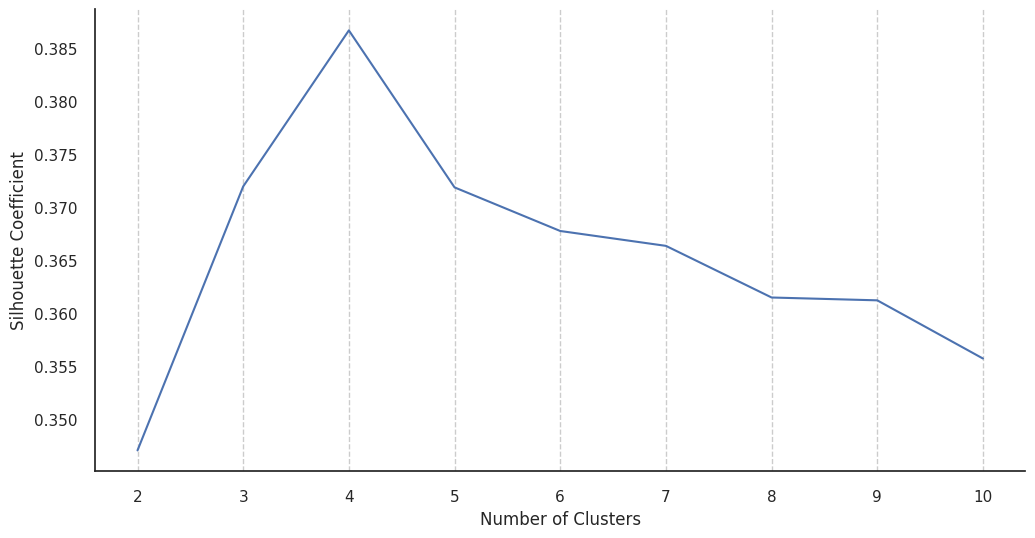

In [225]:
#plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(range(2, 11), silhouette_coefficients)

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)


ax.xaxis.grid(linestyle='dashed')
plt.xticks(range(2, 11))

plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

**Conclusion:** Through the results of 2 tests, the number of clusters to group suitable customers is 4.

### K-Means algorithm


In [226]:
kmeans = KMeans(n_clusters=4,**kmeans_kwargs)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [227]:
data_set['Cluster_Labels'] = kmeans.labels_

<ipython-input-227-558473007592>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Cluster_Labels'] = kmeans.labels_


In [228]:
data_set['Cluster_Labels'].value_counts()

1    206
2    194
0    189
3    181
Name: Cluster_Labels, dtype: int64

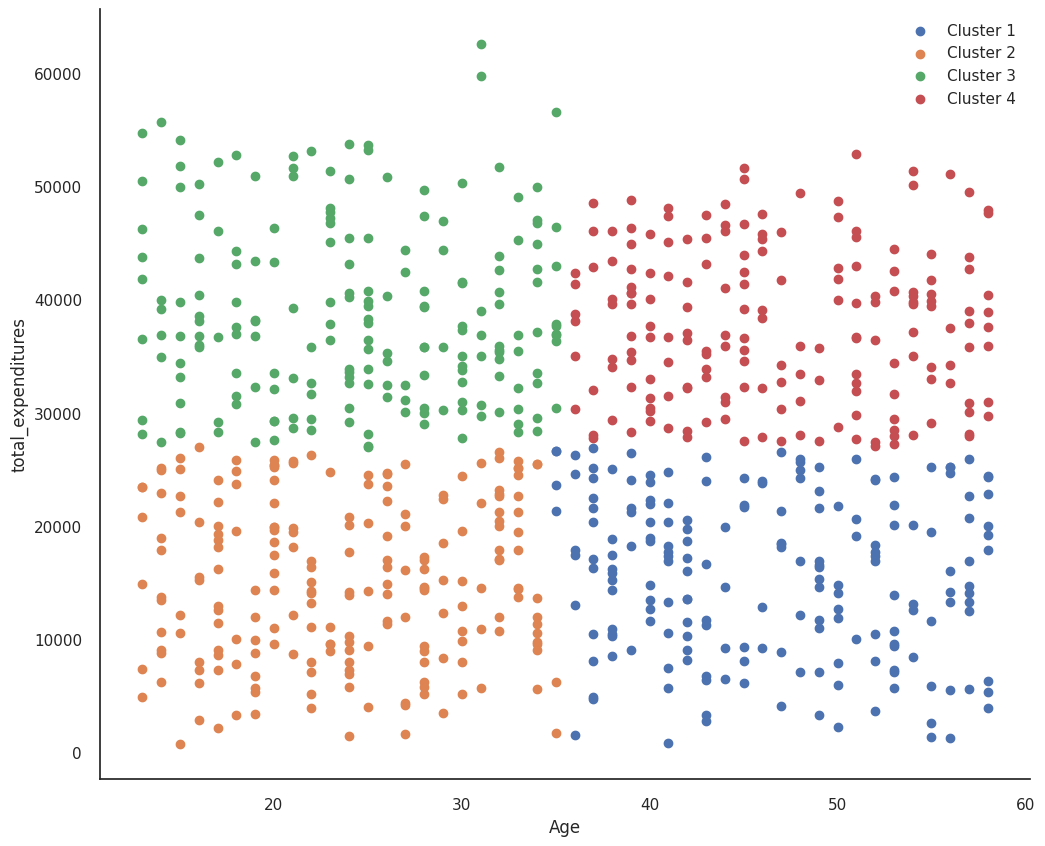

In [234]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(data_set[data_set['Cluster_Labels']==0].Age, data_set[data_set['Cluster_Labels']==0].total_expenditures, label = 'Cluster 1')
ax.scatter(data_set[data_set['Cluster_Labels']==1].Age, data_set[data_set['Cluster_Labels']==1].total_expenditures, label = 'Cluster 2')
ax.scatter(data_set[data_set['Cluster_Labels']==2].Age, data_set[data_set['Cluster_Labels']==2].total_expenditures, label = 'Cluster 3')
ax.scatter(data_set[data_set['Cluster_Labels']==3].Age, data_set[data_set['Cluster_Labels']==3].total_expenditures, label = 'Cluster 4')

spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False)

plt.xlabel('Age', size=12)
plt.ylabel('total_expenditures', size=12)

plt.legend(loc='upper right')
plt.show()

**Conclusion:** The customer segment is divided into 4 groups:

- **Cluster 0:** Group of customers under 35 years old, spending less than 25,000 USD.

- **Cluster 1:** Group of customers under 35 years old, with a spending level of over 25000 USD.
- **Cluster 2:** Group of customers over 35 years old, spending less than 25000 USD.
- **Cluster 3:** Group of customers over 35 years old, with a spending level of over 25,000 USD.